In [1]:
import tensorflow as tf

In [2]:
import keras

In [3]:
from keras.datasets import cifar100

In [4]:
from keras.utils import to_categorical

In [5]:
(train_X, train_Y_),(test_X, test_Y_) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [6]:
train_Y = to_categorical(train_Y_)
test_Y = to_categorical(test_Y_)

In [7]:
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/255

In [8]:
from keras.models import Model

In [9]:
from keras.layers import  Conv2D, Dense, BatchNormalization, Flatten, MaxPool2D, Input, Dropout, AveragePooling2D,Add

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
def create_ResNet18_Network():
  input_layer = Input(shape = (32,32,3))
  conv_layer1 = Conv2D(filters = 32, kernel_size = (7,7) , strides = (2,2), padding = 'same', activation = 'relu')(input_layer)
  pool_layer1 = MaxPool2D(pool_size=(2,2), strides = (2,2))(conv_layer1)
  conv_layer2a = Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', activation = 'relu')(pool_layer1)
  conv_layer2b = Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', activation = 'relu')(conv_layer2a)
  add_layer1 = Add()([conv_layer2a, conv_layer2b])
  conv_layer2c = Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', activation = 'relu')(add_layer1)
  conv_layer2d = Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', activation = 'relu')(conv_layer2c)
  add_layer2 = Add()([conv_layer2c, conv_layer2d])
  conv_layer3a = Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'relu')(add_layer2)
  conv_layer3b = Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'relu')(conv_layer2c)
  dropout_layer1 = Dropout(rate = 0.2)(conv_layer3b)
  add_layer3 =  Add()([conv_layer3a, dropout_layer1])
  conv_layer3c = Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'relu')(add_layer3)
  conv_layer3d = Conv2D(filters = 64, kernel_size=(3,3), padding = 'same', activation = 'relu')(conv_layer3c)
  dropout_layer2 = Dropout(rate = 0.2)(conv_layer3d)
  add_layer4 = Add()([conv_layer3c, dropout_layer2])
  #conv_layer4a = Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', activation = 'relu')(add_layer4)
  #conv_layer4b = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu')(conv_layer4a)
  #add_layer5 = Add()([conv_layer4a, conv_layer4b])
  #conv_layer4c = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu')(add_layer5)
  #conv_layer4d = Conv2D(filters = 32, kernel_size=(3,3), padding = 'same', activation = 'relu')(conv_layer4c)
  #add_layer6 = Add()([conv_layer4c, conv_layer4d])
  pool_layer4 = AveragePooling2D(pool_size = (2,2),strides=(1,1))(add_layer4)
  flatten = Flatten()(pool_layer4)
  dense1 = Dense(units = 256, activation = 'relu')(flatten)
  dropout_layer3 = Dropout(rate = 0.2)(dense1)
  dense2 = Dense(100, activation = 'softmax')(dropout_layer3)
  model = Model(inputs = input_layer, outputs = dense2)
  return model

In [41]:
model  = create_ResNet18_Network()

In [35]:
optimizer = keras.optimizers.Adam(learning_rate= 0.01, beta_1 = 0.9, beta_2 = 0.9)

In [42]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 16, 16, 32)   4736        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 32)     0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 8, 8, 32)     9248        max_pooling2d_1[0][0]            
_______________________________________________________________________________________

In [15]:
from google.colab import drive

In [16]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [44]:
path = F'/content/gdrive/My Drive/Weights/ResNet18_RMSProp_Dropout.h5'

In [45]:
earlyStopping = EarlyStopping(monitor = 'val_accuracy', patience = 50)
checkpoint = ModelCheckpoint(filepath = path, monitor = 'val_accuracy',verbose = 2,  save_best_only=True, save_weights_only=True, mode = 'max')

In [46]:
history = model.fit(x = train_X, y = train_Y, batch_size = 32, epochs = 200, validation_split=0.1, callbacks=[checkpoint, earlyStopping])

Epoch 1/200
1398/1407 [============================>.] - ETA: 0s - loss: 4.1198 - accuracy: 0.0709
Epoch 00001: val_accuracy improved from -inf to 0.13020, saving model to /content/gdrive/My Drive/Weights/ResNet18_RMSProp_Dropout.h5
1407/1407 [==============================] - 8s 6ms/step - loss: 4.1173 - accuracy: 0.0712 - val_loss: 3.7700 - val_accuracy: 0.1302
Epoch 2/200
1401/1407 [============================>.] - ETA: 0s - loss: 3.5225 - accuracy: 0.1666
Epoch 00002: val_accuracy improved from 0.13020 to 0.15740, saving model to /content/gdrive/My Drive/Weights/ResNet18_RMSProp_Dropout.h5
1407/1407 [==============================] - 8s 6ms/step - loss: 3.5226 - accuracy: 0.1666 - val_loss: 3.6063 - val_accuracy: 0.1574
Epoch 3/200
1403/1407 [============================>.] - ETA: 0s - loss: 3.2376 - accuracy: 0.2175
Epoch 00003: val_accuracy improved from 0.15740 to 0.21460, saving model to /content/gdrive/My Drive/Weights/ResNet18_RMSProp_Dropout.h5
1407/1407 [==================

In [48]:
model.load_weights('/content/gdrive/My Drive/Weights/ResNet18_RMSProp_Dropout.h5')

In [49]:
y_pred  = model.predict(test_X)

In [50]:
y_pred = y_pred.argmax(-1)

In [51]:
y_true = test_Y.argmax(-1)

In [52]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [53]:
def get_all_metrics(y_pred, y_true):
  precision = precision_score(y_true,y_pred, average = 'weighted')
  recall = recall_score(y_true , y_pred, average= 'weighted')
  accuracy = accuracy_score(y_true, y_pred)
  return precision, recall, accuracy

In [54]:
prec, recall, accuracy = get_all_metrics(y_pred, y_true)

In [55]:
print('Precision:', prec)

Precision: 0.2939856197760348


In [56]:
print('Recall', recall)

Recall 0.2963


In [57]:
print('Accuracy', accuracy)

Accuracy 0.2963


In [58]:
import pandas as pd

In [59]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [60]:
pd.crosstab(y_pred, y_true, colnames = ['y_predicted'], rownames = ['y_true'])

y_predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
y_true,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,55,2,1,0,0,1,0,2,0,0,4,1,0,0,0,0,1,0,0,0,0,0,3,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3,0,1,0,0,0,0,0,4,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,1,1,0,0,0,3,0,0,0,0,0,1,0
1,1,38,2,0,0,1,0,0,2,0,5,3,0,0,2,0,0,0,4,0,0,0,0,0,0,2,2,0,0,0,1,0,3,0,1,1,0,0,0,0,0,0,0,1,2,1,0,0,1,0,3,2,0,1,1,0,0,0,0,0,0,2,2,1,1,2,2,5,0,0,2,1,0,2,1,0,0,3,0,0,1,0,1,0,0,0,1,3,0,0,1,5,3,2,0,0,0,1,0,0
2,0,0,14,0,0,0,0,0,0,0,0,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,1,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3,1
3,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,2,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,4,8,0,2,1,1,0,0,0,0,0,0,0,1,1,2,0,0,2,0,0,0,1,2,0,0,1,0,0,0,0,4,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,4,1,0,2,0,0,0,0,0,2,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,1,0,3,0,0,30,0,0,0,4,4,1,0,1,0,0,1,0,1,0,3,0,0,0,0,9,1,1,0,0,0,0,0,0,2,0,4,1,0,1,0,0,0,0,2,3,2,0,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,3,2,0,0,0,0,1,0,0,1,1,0,1,2,0,1,1,0,1,9,2,1,1,2,0,0,0,0,0,0,0,0,0,2,2
6,2,1,3,1,0,0,34,3,0,2,0,1,1,0,2,2,3,0,1,0,0,2,0,0,2,0,0,1,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,1,2,1,1,9,2,1,0,0,1,3,0,0,0,2,0,0,1,0,0,0,1
7,0,0,0,2,0,0,0,16,1,0,2,0,0,0,1,0,1,0,0,1,0,0,0,0,5,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,1,0,0,0,0,0,26,0,0,0,1,1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,1,2,0,1,0,0,0,1,1,5,1,0,2,1,0,0,1,0,2,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,2,0,1,0,0,0,0,1,0,0,0,0,1


In [61]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


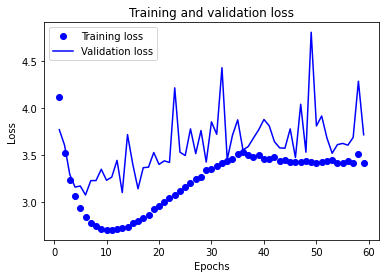

In [62]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()